In [1]:
"""
Minimal smoke examples demonstrating bioviz line/line+annotation/oncoplot/table.
Run inside your project venv where `bioviz` deps are installed.
"""

'\nMinimal smoke examples demonstrating bioviz line/line+annotation/oncoplot/table.\nRun inside your project venv where `bioviz` deps are installed.\n'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from bioviz.configs import (
    HeatmapAnnotationConfig,
    LinePlotConfig,
    OncoplotConfig,
    StyledTableConfig,
    TopAnnotationConfig,
)
from bioviz.plots import LinePlotter, OncoPlotter, TablePlotter

/home/runner/work/bioviz-kit/bioviz-kit/src/bioviz/plots/lineplot.py:450: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.sort_values(config.x).head(1))


line_smoke.pdf


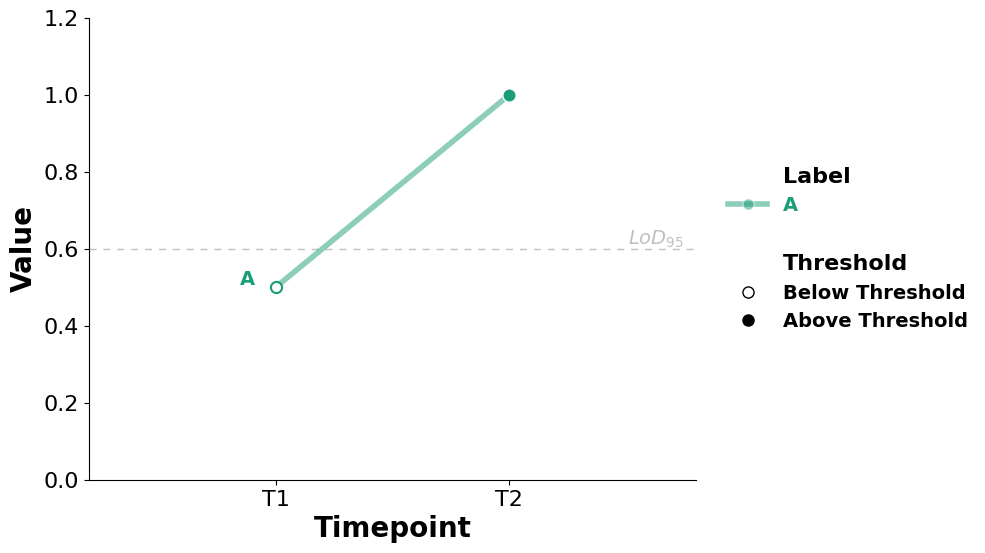

In [3]:
# 1) Line plot minimal data
line_df = pd.DataFrame(
    {
        "Patient_ID": ["p1", "p1"],
        "Label": ["A", "A"],
        "Timepoint": pd.Categorical(["T1", "T2"], categories=["T1", "T2"], ordered=True),
        "Value": [0.5, 1.0],
        "Variant_type": ["SNV", "SNV"],
    }
)
line_cfg = LinePlotConfig(
    entity_id="p1",
    label_col="Label",
    x="Timepoint",
    y="Value",
    secondary_group_col="Variant_type",
    label_points=True,  # show point labels
    threshold=0.6,  # optional threshold line
    threshold_label=r"$LoD_{95}$",  # optional threshold label
    figure_transparent=True,
    ylim=(0, 1.2),
    xlim=None,
)
lp = LinePlotter(line_df, line_cfg)
fig, ax = lp.plot()
if fig:
    fig.savefig("line_smoke.pdf")
print("line_smoke.pdf")

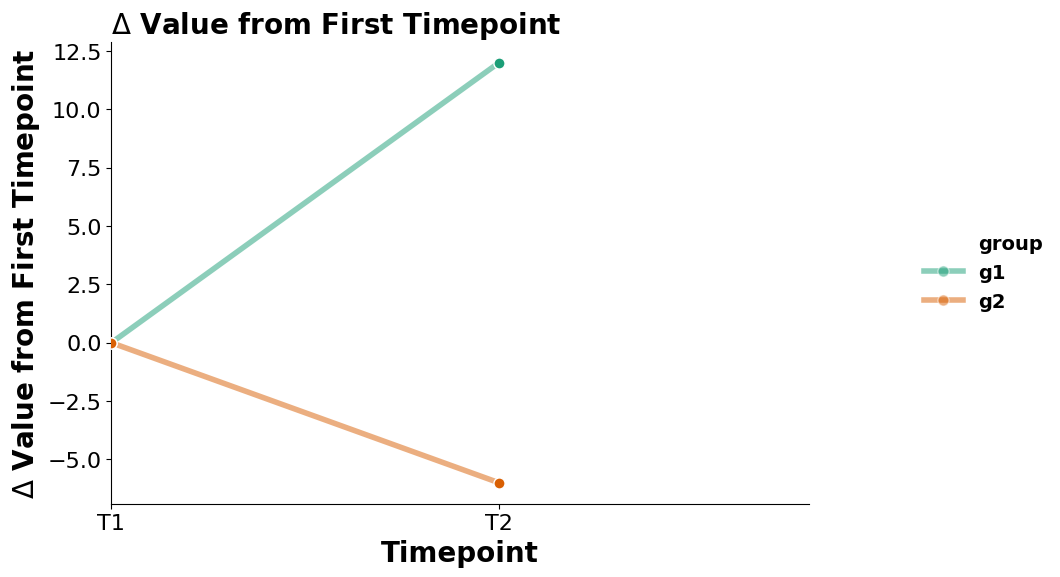

line_overlay_smoke.pdf


In [4]:
# 2) Line overlay (multi-group trajectories)
primary_df = pd.DataFrame(
    {
        "group": ["g1", "g1", "g2", "g2"],
        "Timepoint": pd.Categorical(
            ["T1", "T2", "T1", "T2"], categories=["T1", "T2"], ordered=True
        ),
        "Value": [0, 12, 0, -6],
    }
)
primary_config = LinePlotConfig(
    group_col="group",
    x="Timepoint",
    y="Value",
    title=r"$\Delta$ Value from First Timepoint",
    ylabel=r"$\Delta$ Value from First Timepoint",
    baseline=0,
    align_first_tick_to_origin=True,
)
lp2 = LinePlotter(primary_df, primary_config)
fig, ax = lp2.plot()
plt.show()
if fig:
    fig.savefig("line_overlay_smoke.pdf")
print("line_overlay_smoke.pdf")

line_plus_annotation_smoke.pdf


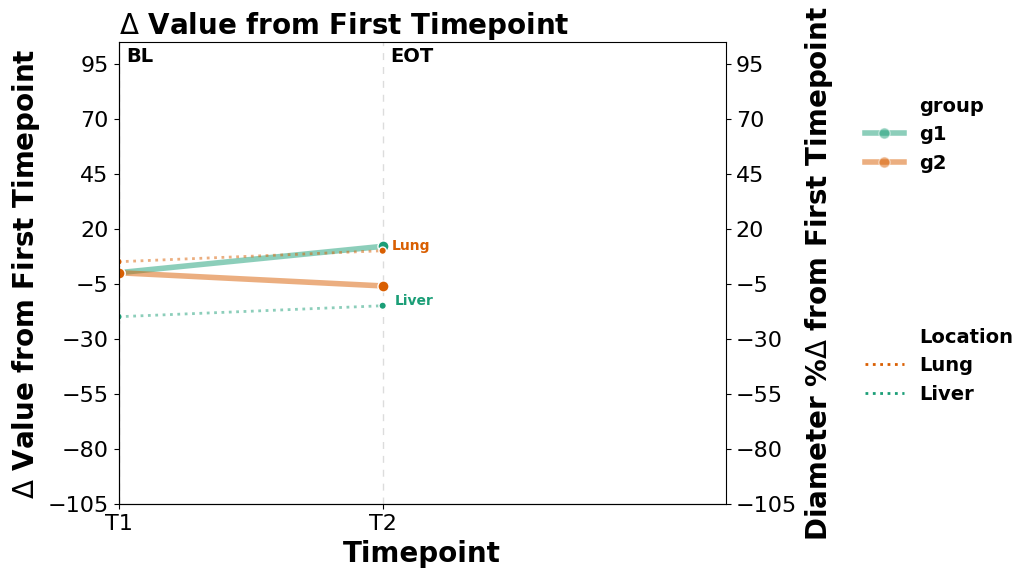

In [5]:
# 3a) Line + twin x-axis overlay
# Use a second LinePlotConfig for the overlay, specifying overlay_* fields and shared x.
twinx_df = pd.DataFrame(
    {
        "Timepoint": pd.Categorical(
            ["T1", "T1", "T2", "T2"], categories=["T1", "T2"], ordered=True
        ),
        "DiameterChange": [5, -20, 10, -15],
        "Location": ["Lung", "Liver", "Lung", "Liver"],
        "Assessment": ["BL", "BL", "EOT", "EOT"],
    }
)
secondary_config = LinePlotConfig(
    x="Timepoint",
    y="DiameterChange",
    label_col="Location",
    overlay_col="Assessment",
    title="Twin x-axis overlay",
    align_first_tick_to_origin=False,
)
fig_combined = lp2.plot(
    twinx_data=twinx_df,
    secondary_config=secondary_config,
)[0]
fig_combined.savefig("line_plus_annotation_smoke.pdf")
print("line_plus_annotation_smoke.pdf")

line_plus_annotation_raw_smoke.pdf


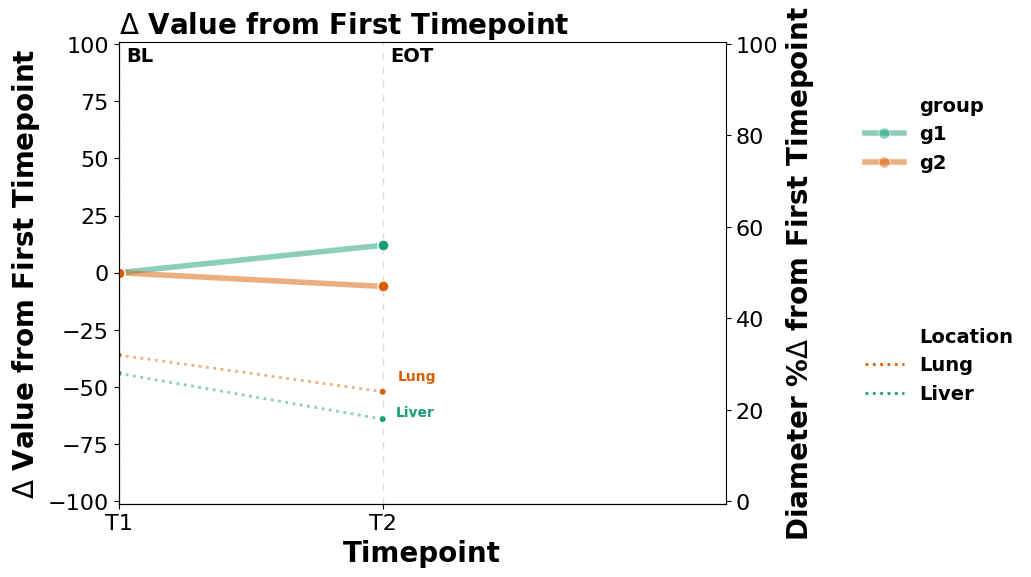

In [6]:
# 3a-raw) Line + twin x-axis overlay with raw values on secondary axis
raw_twin_df = pd.DataFrame(
    {
        "Timepoint": pd.Categorical(
            ["T1", "T1", "T2", "T2"], categories=["T1", "T2"], ordered=True
        ),
        "RawDiameterMM": [32, 28, 24, 18],
        "Location": ["Lung", "Liver", "Lung", "Liver"],
        "Assessment": ["BL", "BL", "EOT", "EOT"],
    }
)
raw_secondary_cfg = LinePlotConfig(
    x="Timepoint",
    y="RawDiameterMM",  # twin axis uses standard y/hue; overlay_* inferred automatically
    label_col="Location",
    overlay_col="Assessment",
    title="Twin overlay (raw values)",
    symmetric_ylim=False,
)
# Set independent limits per axis: primary -100..100, secondary 0..100
primary_config.ylim = (-101, 101)
raw_secondary_cfg.ylim = (-0.5, 100.5)
fig_combined_raw = lp2.plot(
    twinx_data=raw_twin_df,
    secondary_config=raw_secondary_cfg,
)[0]
fig_combined_raw.savefig("line_plus_annotation_raw_smoke.pdf")
print("line_plus_annotation_raw_smoke.pdf")

line_plus_annotation_single_df_smoke.pdf


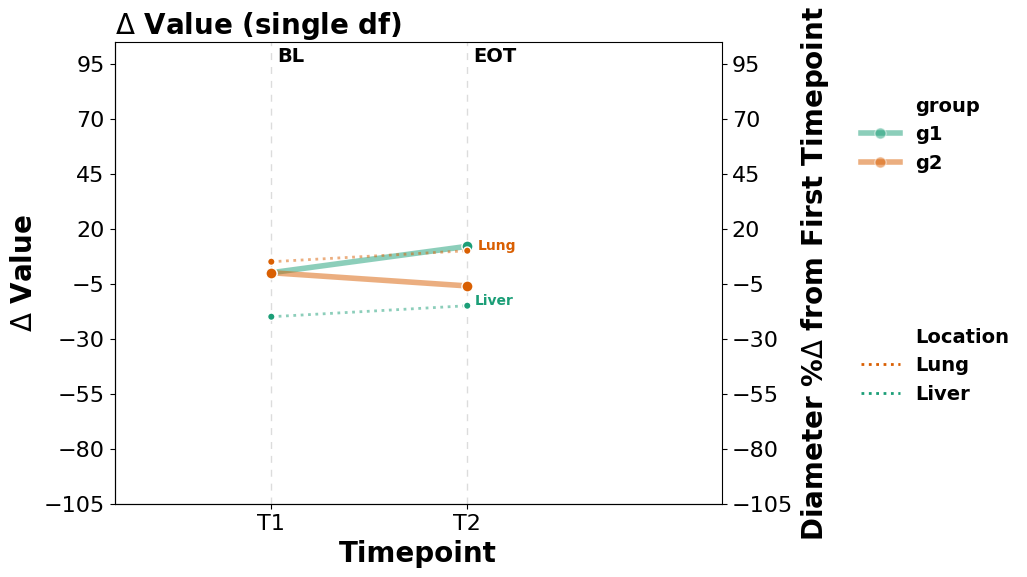

In [7]:
# 3b) Line + twin x-axis overlay reusing a single DataFrame
# Here we keep everything in one long DataFrame and let the overlay config pull its columns.
twin_single_df = pd.DataFrame(
    {
        "group": ["g1", "g1", "g2", "g2"],
        "Timepoint": pd.Categorical(
            ["T1", "T2", "T1", "T2"], categories=["T1", "T2"], ordered=True
        ),
        "Value": [0, 12, 0, -6],
        # Mirror the overlay points used in 3a so each Location spans both timepoints.
        "DiameterChange": [5, 10, -20, -15],
        "Location": ["Lung", "Lung", "Liver", "Liver"],
        "Assessment": ["BL", "EOT", "BL", "EOT"],
    }
)
twin_single_cfg_main = LinePlotConfig(
    group_col="group",
    x="Timepoint",
    y="Value",
    title=r"$\Delta$ Value (single df)",
    ylabel=r"$\Delta$ Value",
    baseline=0,  # optional baseline line
    align_first_tick_to_origin=False,
)
twin_single_cfg_overlay = LinePlotConfig(
    x="Timepoint",
    y="DiameterChange",
    label_col="Location",
    overlay_col="Assessment",
    title="Twin overlay (single df)",
)
lp3 = LinePlotter(twin_single_df, twin_single_cfg_main)
fig_combined_single_df = lp3.plot(
    twinx_data=None,
    secondary_config=twin_single_cfg_overlay,
)[0]
fig_combined_single_df.savefig("line_plus_annotation_single_df_smoke.pdf")
print("line_plus_annotation_single_df_smoke.pdf")

table_smoke.pdf


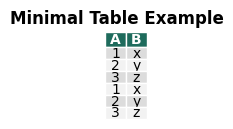

In [8]:
# 4) Table minimal data
table_df = pd.DataFrame({"A": [1, 2, 3] * 2, "B": ["x", "y", "z"] * 2})
table_cfg = StyledTableConfig(
    table_width=1.75,
    header_row_height=0.2,
    row_height=0.15,
    title="Minimal Table Example",
    auto_shrink_total_height=True,
    shrink_row_threshold=1,
    max_total_height=4.0,
)
tp = TablePlotter(table_df, table_cfg)
fig_table, ax_table = tp.plot()
if fig_table:
    # fig_table.savefig("table_smoke.pdf", bbox_inches="tight", pad_inches=0.05)
    print("table_smoke.pdf")

table_multiline_smoke.pdf


/home/runner/work/bioviz-kit/bioviz-kit/src/bioviz/plots/table.py:300: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  created_fig.tight_layout()


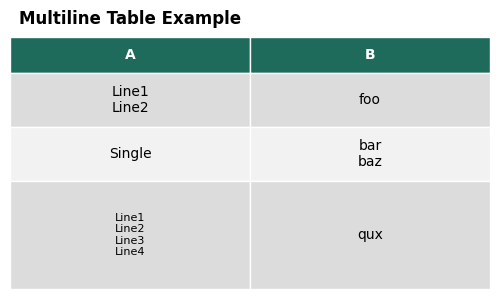

In [9]:
# 4b) Table with multi-line cells
multi_table_df = pd.DataFrame(
    {
        "A": ["Line1\nLine2", "Single", "Line1\nLine2\nLine3\nLine4"],
        "B": ["foo", "bar\nbaz", "qux"],
    }
)
multi_table_cfg = StyledTableConfig(
    table_width=2,
    header_row_height=0.2,
    row_height=0.2,
    row_height_multiplier=0.75,
    title="Multiline Table Example",
    auto_shrink_total_height=True,
    shrink_row_threshold=1,
    max_total_height=3,
)
tp2 = TablePlotter(multi_table_df, multi_table_cfg)
fig_table_multi, ax_table_multi = tp2.plot()
if fig_table_multi:
    print("table_multiline_smoke.pdf")

table_auto_widths_smoke.pdf


/home/runner/work/bioviz-kit/bioviz-kit/src/bioviz/plots/table.py:300: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  created_fig.tight_layout()


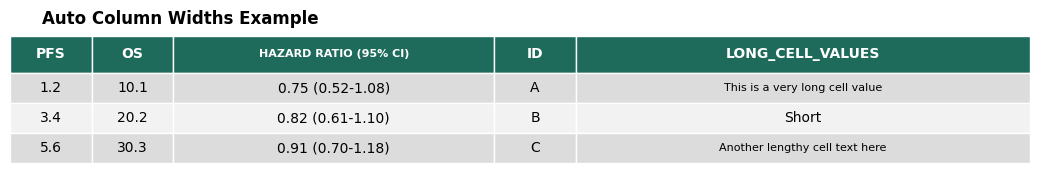

In [10]:
# 4c) Table with auto column widths - columns sized by content length
# Demonstrates: short headers (PFS, OS) vs long headers (HAZARD RATIO (95% CI))
# Also handles case where cell content is longer than header
auto_width_df = pd.DataFrame(
    {
        "PFS": [1.2, 3.4, 5.6],
        "OS": [10.1, 20.2, 30.3],
        "HAZARD RATIO (95% CI)": ["0.75 (0.52-1.08)", "0.82 (0.61-1.10)", "0.91 (0.70-1.18)"],
        "ID": ["A", "B", "C"],
        "LONG_CELL_VALUES": [
            "This is a very long cell value",
            "Short",
            "Another lengthy cell text here",
        ],
    }
)
auto_width_cfg = StyledTableConfig(
    table_width=3.0,
    header_row_height=0.25,
    row_height=0.2,
    title="Auto Column Widths Example",
    auto_column_widths=True,  # Key feature: columns sized by content
    min_column_width_fraction=0.08,  # Prevent too-narrow columns
)
tp_auto = TablePlotter(auto_width_df, auto_width_cfg)
fig_auto, ax_auto = tp_auto.plot()
if fig_auto:
    fig_auto.savefig("table_auto_widths_smoke.pdf", bbox_inches="tight", pad_inches=0.05)
    print("table_auto_widths_smoke.pdf")

/home/runner/work/bioviz-kit/bioviz-kit/src/bioviz/plots/table.py:300: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  created_fig.tight_layout()


table_manual_widths_smoke.pdf


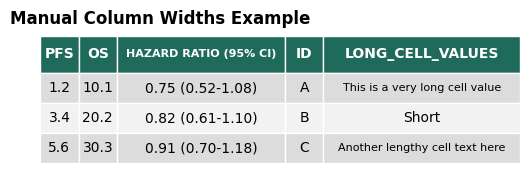

In [11]:
# 4d) Table with manual column widths - explicit control
manual_width_cfg = StyledTableConfig(
    table_width=2.0,
    header_row_height=0.25,
    row_height=0.2,
    title="Manual Column Widths Example",
    column_widths=[0.08, 0.08, 0.35, 0.08, 0.41],  # Explicit fractions
)
tp_manual = TablePlotter(auto_width_df, manual_width_cfg)
fig_manual, ax_manual = tp_manual.plot()
if fig_manual:
    fig_manual.savefig("table_manual_widths_smoke.pdf", bbox_inches="tight", pad_inches=0.05)
    print("table_manual_widths_smoke.pdf")

Saved oncoplot.pdf


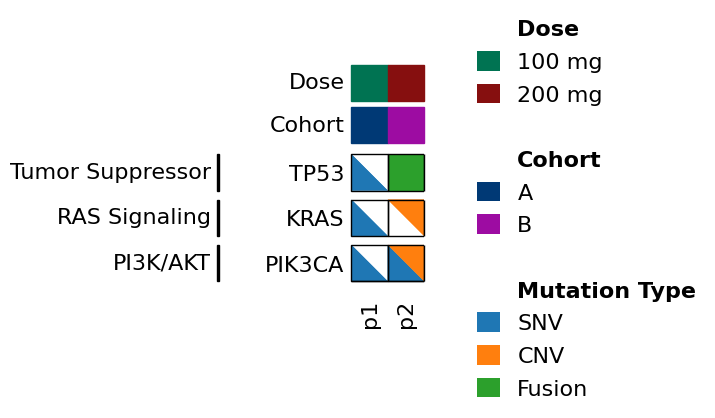

In [12]:
# 5) Oncoplot minimal data with pathway (row-group) bars
mut_df = pd.DataFrame(
    {
        # include SNV, SV (bottom-left triangle) and CNV (upper-right triangle)
        "Patient_ID": ["p1", "p1", "p2", "p2", "p1", "p2", "p2"],
        "Gene": ["TP53", "KRAS", "KRAS", "TP53", "PIK3CA", "PIK3CA", "PIK3CA"],
        "Variant_type": ["SNV", "SNV", "CNV", "Fusion", "SNV", "SNV", "CNV"],
        # minimal top-annotation column for the example
        "Cohort": ["A", "A", "B", "B", "A", "B", "B"],
        "Dose": ["100 mg", "100 mg", "200 mg", "200 mg", "100 mg", "200 mg", "200 mg"],
    }
)

# Create row_groups DataFrame: index=Gene, column='Pathway'
# This drives pathway bar drawing
row_groups = pd.DataFrame(
    {
        "Pathway": {
            "TP53": "Tumor Suppressor",
            "KRAS": "RAS Signaling",
            "PIK3CA": "PI3K/AKT",
        }
    }
).rename_axis("Gene")

# Pathway bar colors
row_groups_color_dict = {
    "Tumor Suppressor": "#000000",
    "RAS Signaling": "#000000",
    "PI3K/AKT": "#000000",
}

# assume mut_df has Patient_ID and some category column like 'Cohort'
cohort_series = mut_df.drop_duplicates("Patient_ID").set_index("Patient_ID")["Cohort"]
dose_series = mut_df.drop_duplicates("Patient_ID").set_index("Patient_ID")["Dose"]

# Map colors for all mutation/value types
colors = {"SNV": "#1f77b4", "CNV": "#ff7f0e", "Fusion": "#2ca02c"}

# TopAnnotationConfig uses tuned package defaults (height, fonts, borders)
top_ann = TopAnnotationConfig(
    values=cohort_series,
    colors={
        "A": "#003975",
        "B": "#9d0ca2",
    },
    legend_title="Cohort",
    legend_value_order=["A", "B"],
    merge_labels=False,
    show_category_labels=False,
)

dose_ann = TopAnnotationConfig(
    values=dose_series,
    colors={
        "100 mg": "#007352",
        "200 mg": "#860F0F",
    },
    legend_title="Dose",
    legend_value_order=["100 mg", "200 mg"],
    merge_labels=False,
    show_category_labels=False,
)

heat_ann = HeatmapAnnotationConfig(
    values="Variant_type",  # or a pd.Series mapping patient->value
    colors=colors,
    bottom_left_triangle_values=[
        "SNV"
    ],  # these render as bottom-left triangles. make empty list to disable.
    upper_right_triangle_values=["CNV"],  # these render as top-right triangles
    legend_title="Mutation Type",
    legend_value_order=["SNV", "CNV", "Fusion"],
)

onc_cfg = OncoplotConfig(
    x_col="Patient_ID",
    y_col="Gene",
    value_col="Variant_type",
    row_group_col="Pathway",
    col_sort_by=["Patient_ID"],
    heatmap_annotation=heat_ann,
    top_annotations={"Cohort": top_ann, "Dose": dose_ann},
    legend_category_order=["Dose", "Cohort", "Mutation Type"],
)

plotter = OncoPlotter(
    mut_df,
    onc_cfg,
    row_groups=row_groups,
    row_groups_color_dict=row_groups_color_dict,
)
fig_oncoplot = plotter.plot()

fig_oncoplot.savefig("oncoplot.pdf", bbox_inches="tight", pad_inches=0.1, dpi=150)
print("Saved oncoplot.pdf")